In [1]:
import numpy as np
import mne
import os
import math
import pandas as pd
from  pandas import DataFrame
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel, f_oneway
from mne.stats import fdr_correction, f_mway_rm
from scipy import signal
from pandas import Series, ExcelWriter
from mne.time_frequency import tfr_array_morlet
from neurora.stuff import clusterbased_permutation_2d_2sided,clusterbased_permutation_2d_1samp_2sided

# ERP分析，计算幅值

# 1.计算成年人的MMN和P300

## 1.1 分条件：在标准刺激和新异刺激下叠加平均

In [27]:
adult_standard_erp = []
adult_novel_erp = []

for i in range(78):
    
    ###读取standard
    standard_data_path = "E:/standard and novel/" + "sub"+str(i+1)+"/standard.set"
    #读取set文件中的epoch信息
    standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)
    #对epoch进行叠加平均
    standard_evoked = standard_epochs.average()
    #读取叠加平均后指定电极*时间的矩阵（F1234z,fc1234Z,C1234Z)
    #standard_erp = evoked.data[[7,8,9,10,11,16,17,18,19,20,25,26,27,28,29]][400:]
    #取电极FZ 截取-100-500ms
    standard_erp = standard_evoked.data[[7,8,9,10,11,16,17,18,19,20,25,26,27,28,29]]
    standard_erp = standard_erp[:,400:]
    print((standard_evoked.data).shape)
    adult_standard_erp.append(standard_erp)
    
    
    ###读取novel
    novel_data_path = "E:/standard and novel/" + "sub"+str(i+1)+"/novel.set"
    #读取set文件中的epoch信息
    novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)
    #对epoch进行叠加平均
    novel_evoked = novel_epochs.average()
    print((novel_evoked.data).shape)
    #读取叠加平均后指定电极*时间的矩阵（F1234z,fc1234Z,C1234Z)
    novel_erp = novel_evoked.data[[7,8,9,10,11,16,17,18,19,20,25,26,27,28,29],]
    novel_erp =  novel_erp[:,400:]
    print((novel_evoked.data).shape)
    adult_novel_erp.append(novel_erp)
       
adult_standard_erp = np.array(adult_standard_erp)
print(adult_standard_erp.shape)
adult_novel_erp = np.array(adult_novel_erp)
print(adult_novel_erp.shape)

Extracting parameters from E:/standard and novel/sub1/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub1/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub2/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub2/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub3/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub3/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub4/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub4/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub5/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(61, 1000)
Extracting parameters from E:/standard and novel/sub5/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(61, 1000)
(61, 1000)
Extracting parameters from E:/standard and novel/sub6/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub6/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub7/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub7/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub8/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
93 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub8/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub9/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub9/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub10/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
85 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub10/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
91 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub11/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub11/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub12/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub12/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub13/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub13/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub14/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
94 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub14/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub15/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub15/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub16/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub16/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub17/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub17/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub18/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub18/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub19/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub19/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub20/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
85 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub20/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
91 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub21/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub21/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub22/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub22/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub23/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub23/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub24/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
93 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub24/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub25/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub25/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub26/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub26/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub27/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub27/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub28/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub28/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub29/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub29/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub30/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub30/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub31/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(61, 1000)
Extracting parameters from E:/standard and novel/sub31/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(61, 1000)
(61, 1000)
Extracting parameters from E:/standard and novel/sub32/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub32/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub33/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
91 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub33/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
89 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub34/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub34/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub35/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub35/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub36/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub36/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub37/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub37/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
89 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub38/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub38/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub39/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub39/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
87 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub40/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(61, 1000)
Extracting parameters from E:/standard and novel/sub40/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(61, 1000)
(61, 1000)
Extracting parameters from E:/standard and novel/sub41/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(60, 1000)
Extracting parameters from E:/standard and novel/sub41/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(60, 1000)
(60, 1000)
Extracting parameters from E:/standard and novel/sub42/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(60, 1000)
Extracting parameters from E:/standard and novel/sub42/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(60, 1000)
(60, 1000)
Extracting parameters from E:/standard and novel/sub43/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub43/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub44/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(61, 1000)
Extracting parameters from E:/standard and novel/sub44/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(61, 1000)
(61, 1000)
Extracting parameters from E:/standard and novel/sub45/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub45/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub46/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(60, 1000)
Extracting parameters from E:/standard and novel/sub46/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(60, 1000)
(60, 1000)
Extracting parameters from E:/standard and novel/sub47/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub47/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub48/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub48/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub49/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub49/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub50/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub50/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub51/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
94 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub51/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
90 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub52/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub52/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub53/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub53/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub54/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub54/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub55/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub55/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub56/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub56/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub57/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
93 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub57/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
93 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub58/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub58/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub59/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
94 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub59/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub60/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub60/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub61/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub61/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
94 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub62/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub62/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub63/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub63/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub64/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Ready.
(61, 1000)
Extracting parameters from E:/standard and novel/sub64/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(61, 1000)
(61, 1000)
Extracting parameters from E:/standard and novel/sub65/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub65/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub66/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
88 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub66/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
87 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub67/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub67/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub68/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub68/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub69/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(60, 1000)
Extracting parameters from E:/standard and novel/sub69/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(60, 1000)
(60, 1000)
Extracting parameters from E:/standard and novel/sub70/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub70/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
91 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub71/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(61, 1000)
Extracting parameters from E:/standard and novel/sub71/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(61, 1000)
(61, 1000)
Extracting parameters from E:/standard and novel/sub72/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub72/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub73/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub73/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub74/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub74/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub75/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub75/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
Extracting parameters from E:/standard and novel/sub76/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
83 matching events found
No baseline correction applied
0 projection items activated
Ready.
(60, 1000)
Extracting parameters from E:/standard and novel/sub76/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
92 matching events found
No baseline correction applied
0 projection items activated
Ready.
(60, 1000)
(60, 1000)
Extracting parameters from E:/standard and novel/sub77/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated
Ready.
(61, 1000)
Extracting parameters from E:/standard and novel/sub77/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
87 matching events found
No baseline correction applied
0 projection items activated
Ready.
(61, 1000)
(61, 1000)
Extracting parameters from E:/standard and novel/sub78/standard.set...


<ipython-input-27-5128ab89d92c>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
Extracting parameters from E:/standard and novel/sub78/novel.set...


<ipython-input-27-5128ab89d92c>:24: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 1000)
(62, 1000)
(78, 15, 600)
(78, 15, 600)


## 1.2 算出差异波，分别计算MMN和P300

### 1.2.1 MMN

In [32]:
#计算新异刺激和标准刺激的差异波
diff = adult_novel_erp - adult_standard_erp
#基于FZ的活动取峰值和潜伏期
diff_FCz = diff[:,7,:] 

mmn_amplitude = []
#mmn_latency = []

for i in range(78):
    #选取80-250ms的数据
    data_mmn_FCz = diff_FCz[i][180:350]
    #基于FCz电极在80-250ms范围内选取最负的值
    mmn_time_index = np.where(data_mmn_FCz == np.min(data_mmn_FCz))
    mmn_peak_index = mmn_time_index[0][0]
    #计算每个被试，15个电极上峰值前后10ms电压值的平均，并将单位从v转为uv
    mmn_amplitude_all = diff[i]
    mmn_amplitude_all = mmn_amplitude_all[:,mmn_peak_index + 170:mmn_peak_index + 190]
    amplitude = math.pow(10,6) * np.average(mmn_amplitude_all, axis = 1)
    #计算潜伏期
    #latency = 80 + mmn_peak_index
    mmn_amplitude.append(amplitude)
    #mmn_latency.append(latency)

#将数据存到excel
MMN = np.mat(mmn_amplitude)
adult_MMN = pd.DataFrame(MMN, columns = ["F3","F1","FZ","F2","F4","FC3","FC1","FCZ","FC2","FC4","C3","C1","CZ","C2","C4"])
adult_MMN.to_excel('adult_MMN.xlsx')


0
-0.25737329898777306
(15, 20)
(15,)
-0.25737329898777306
15
-3.391069888579854
(15, 20)
(15,)
-3.391069888579854
35
-5.421769055709931
(15, 20)
(15,)
-5.421769055709931
79
-6.609900301595175
(15, 20)
(15,)
-6.609900301595175
74
-2.493110977153774
(15, 20)
(15,)
-2.493110977153774
67
-7.27354564611279
(15, 20)
(15,)
-7.27354564611279
72
-6.807733705005144
(15, 20)
(15,)
-6.807733705005144
92
-1.7442972728421553
(15, 20)
(15,)
-1.7442972728421553
70
-6.39752759234343
(15, 20)
(15,)
-6.39752759234343
0
-1.2038445607551378
(15, 20)
(15,)
-1.2038445607551378
65
-4.846183598091709
(15, 20)
(15,)
-4.846183598091709
57
-1.404888695452731
(15, 20)
(15,)
-1.404888695452731
42
-8.823755095956628
(15, 20)
(15,)
-8.823755095956628
77
-6.9688283758767895
(15, 20)
(15,)
-6.9688283758767895
55
-2.74543875542095
(15, 20)
(15,)
-2.74543875542095
0
-0.34827312707236735
(15, 20)
(15,)
-0.34827312707236735
70
-3.3117452984301403
(15, 20)
(15,)
-3.3117452984301403
77
-3.59546061245292
(15, 20)
(15,)
-3.59

### 1.2.2 P300

In [39]:
diff = adult_novel_erp - adult_standard_erp
#基于FZ的活动取峰值和潜伏期
diff_FCz = diff[:,7,:] 

P300_amplitude = []
#P300_latency = []

for i in range(78):
    #选取80-250ms的数据
    data_P300_FCz = diff_FCz[i][300:500]
    P300_time_index = np.where(data_P300_FCz == np.max(data_P300_FCz))
    P300_peak_index = P300_time_index[0][0]
    print(P300_peak_index)
    data_FCz = diff_FCz[i]
    amplitude_FCz = math.pow(10,6)*np.average(diff_FCz[i][P300_peak_index + 290:P300_peak_index + 310])
    print(amplitude_FCz)
    amplitude_all = diff[i]
    amplitude_all = amplitude_all[:,P300_peak_index + 290:P300_peak_index + 310]
    print(amplitude_all.shape)
    amplitude = math.pow(10,6) * np.average(amplitude_all, axis = 1)
    print(amplitude.shape)
    print(amplitude[7])
    latency = 200 + P300_peak_index
    P300_amplitude.append(amplitude)
    #P300_latency.append(latency)


P300 = np.mat(P300_amplitude)
adult_P300 = pd.DataFrame(P300, columns = ["F3","F1","FZ","F2","F4","FC3","FC1","FCZ","FC2","FC4","C3","C1","CZ","C2","C4"])
adult_P300.to_excel('adult_P300.xlsx')


118
0.5879571177146407
(15, 20)
(15,)
0.5879571177146407
33
6.794425272979048
(15, 20)
(15,)
6.794425272979048
44
6.16537376656787
(15, 20)
(15,)
6.16537376656787
45
7.660537708901457
(15, 20)
(15,)
7.660537708901457
57
6.637974212076028
(15, 20)
(15,)
6.637974212076028
44
11.763101693430103
(15, 20)
(15,)
11.763101693430103
54
5.693697181320293
(15, 20)
(15,)
5.693697181320293
42
8.596815886145633
(15, 20)
(15,)
8.596815886145633
40
5.7815482696971285
(15, 20)
(15,)
5.7815482696971285
169
1.5861570712709112
(15, 20)
(15,)
1.5861570712709112
56
9.526176248347765
(15, 20)
(15,)
9.526176248347765
79
1.0676829990223802
(15, 20)
(15,)
1.0676829990223802
6
7.336763223597103
(15, 20)
(15,)
7.336763223597103
49
8.856683741529721
(15, 20)
(15,)
8.856683741529721
84
6.380331776850152
(15, 20)
(15,)
6.380331776850152
35
3.6675646352214173
(15, 20)
(15,)
3.6675646352214173
39
9.615603131137094
(15, 20)
(15,)
9.615603131137094
67
2.2334127309649388
(15, 20)
(15,)
2.2334127309649388
38
4.5835087869

# 2. 计算儿童的MMN和P300

## 2.1 分条件：在标准刺激和新异刺激下叠加平均

In [31]:
child_standard_erp = []
child_novel_erp = []

for i in range(113):
    
    ###读取standard
    standard_data_path = "E:/standard and novel/" + "sub"+str(i+79)+"/standard.set"
    #读取set文件中的epoch信息
    standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)
    #对epoch进行叠加平均
    standard_evoked = standard_epochs.average()
    #读取叠加平均后指定电极*时间的矩阵（F2,FCZ,FZ,FC1,F1,F3,FC3,C1,C3,C4,C2,FC4,FC2,F4,CZ)
    ################################   [3,4,6,7,9,12,16,17,21,57,58,60,61,68,69]
    #将数据转成和成年人一样的电极顺序
    #standard_erp = evoked.data[[7,8,9,10,11,16,17,18,19,20,25,26,27,28,29]][400:]
    #取电极FZ 截取-100-500ms[F3,F1,FZ,F2,F4,FC3,FC1.FCZ,FC2,FC4,C3,C1,CZ,C2,C4]
    standard_erp = standard_evoked.data[[12,9,6,3,68,16,7,4,61,60,21,17,69,58,57]]
    standard_erp = standard_erp[:,400:]
    print((standard_evoked.data).shape)
    child_standard_erp.append(standard_erp)
    
    
    ###读取novel
    novel_data_path = "E:/standard and novel/" + "sub"+str(i+79)+"/novel.set"
    #读取set文件中的epoch信息
    novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)
    #对epoch进行叠加平均
    novel_evoked = novel_epochs.average()
    print((novel_evoked.data).shape)
    #读取叠加平均后指定电极*时间的矩阵（F1234z,fc1234Z,C1234Z)
    novel_erp = novel_evoked.data[[12,9,6,3,68,16,7,4,61,60,21,17,69,58,57]]
    novel_erp =  novel_erp[:,400:]
    print((novel_evoked.data).shape)
    child_novel_erp.append(novel_erp)
       
child_standard_erp = np.array(child_standard_erp)
print(child_standard_erp.shape)
child_novel_erp = np.array(child_novel_erp)
print(child_novel_erp.shape)

Extracting parameters from E:/standard and novel/sub79/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub79/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub80/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub80/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub81/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub81/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub82/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub82/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub83/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub83/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub84/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
85 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub84/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
88 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub85/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub85/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub86/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub86/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub87/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub87/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub88/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
81 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub88/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
77 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub89/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub89/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub90/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub90/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub91/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub91/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub92/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
77 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub92/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
76 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub93/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub93/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub94/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
92 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub94/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub95/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub95/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
74 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub96/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
90 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub96/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
89 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub97/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub97/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub98/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
66 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub98/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
66 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub99/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub99/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub100/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
92 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub100/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
91 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub101/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub101/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub102/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
94 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub102/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
90 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub103/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub103/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub104/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
93 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub104/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
90 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub105/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
90 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub105/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
85 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub106/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub106/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub107/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub107/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub108/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
91 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub108/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub109/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub109/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub110/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub110/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub111/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub111/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub112/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub112/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
85 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub113/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
82 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub113/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
88 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub114/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub114/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub115/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub115/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
92 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub116/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub116/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub117/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub117/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub118/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
88 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub118/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
94 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub119/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
87 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub119/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
87 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub120/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub120/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub121/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub121/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub122/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub122/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
94 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub123/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub123/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
94 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub124/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub124/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
94 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub125/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub125/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub126/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub126/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub127/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub127/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub128/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub128/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
94 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub129/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub129/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub130/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
67 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub130/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
62 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub131/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub131/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub132/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
91 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub132/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
89 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub133/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
93 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub133/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub134/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
85 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub134/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
87 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub135/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub135/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub136/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub136/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub137/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
93 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub137/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub138/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub138/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub139/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
92 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub139/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub140/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub140/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub141/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
91 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub141/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
93 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub142/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub142/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub143/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub143/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub144/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub144/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub145/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
90 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub145/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
91 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub146/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub146/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub147/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub147/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub148/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
76 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub148/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
70 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub149/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
94 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub149/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
94 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub150/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub150/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub151/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub151/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub152/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub152/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub153/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
90 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub153/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
92 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub154/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub154/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub155/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub155/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub156/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub156/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub157/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
86 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub157/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
88 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub158/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub158/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
93 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub159/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
91 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub159/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
90 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub160/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub160/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub161/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub161/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub162/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
87 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub162/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
88 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub163/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
94 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub163/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
93 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub164/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub164/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub165/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
91 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub165/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
90 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub166/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub166/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub167/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub167/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub168/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub168/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub169/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub169/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub170/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub170/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub171/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub171/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub172/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub172/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub173/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
81 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub173/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
83 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub174/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub174/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub175/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub175/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub176/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub176/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub177/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub177/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub178/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
86 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub178/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
84 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub179/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub179/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub180/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub180/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub181/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
92 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub181/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
93 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub182/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub182/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub183/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub183/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub184/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub184/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub185/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub185/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub186/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub186/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub187/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub187/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub188/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub188/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub189/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub189/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub190/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub190/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
Extracting parameters from E:/standard and novel/sub191/standard.set...


<ipython-input-31-f599fd684862>:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
Extracting parameters from E:/standard and novel/sub191/novel.set...


<ipython-input-31-f599fd684862>:25: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 1000)
(70, 1000)
(113, 15, 600)
(113, 15, 600)


## 2.2 算出差异波，计算MMN和P300

### 2.2.1 MMN

In [32]:
#计算新异刺激和标准刺激的差异波
diff = child_novel_erp - child_standard_erp
#基于FZ的活动取峰值和潜伏期
diff_FCz = diff[:,7,:] 

mmn_amplitude = []
#mmn_latency = []

for i in range(113):
    #选取80-250ms的数据
    data_mmn_FCz = diff_FCz[i][180:350]
    #基于FCz电极在80-250ms范围内选取最负的值
    mmn_time_index = np.where(data_mmn_FCz == np.min(data_mmn_FCz))
    mmn_peak_index = mmn_time_index[0][0]
    print(mmn_peak_index)
    #计算每个被试，15个电极上峰值前后10ms电压值的平均，并将单位从v转为uv
    mmn_amplitude_all = diff[i]
    print(mmn_amplitude_all.shape)
    mmn_amplitude_all = mmn_amplitude_all[:,mmn_peak_index + 170:mmn_peak_index + 190]
    amplitude = math.pow(10,6) * np.average(mmn_amplitude_all, axis = 1)
    print(amplitude)
    #计算潜伏期
    #latency = 80 + mmn_peak_index
    mmn_amplitude.append(amplitude)
    #mmn_latency.append(latency)

#将数据存到excel
MMN = np.mat(mmn_amplitude)
child_MMN = pd.DataFrame(MMN, columns = ["F3","F1","FZ","F2","F4","FC3","FC1","FCZ","FC2","FC4","C3","C1","CZ","C2","C4"])
child_MMN.to_excel('child_MMN.xlsx')

1
(15, 600)
[-2.96914665 -3.05235848 -3.73161566 -2.15212651 -1.46392107 -1.7221247
 -2.75127236 -3.08216387 -1.5473509   0.6222449  -1.3695942  -1.51903275
 -0.90231592  0.30236174  0.74583419]
35
(15, 600)
[-2.55268303 -1.60975994 -1.32468091 -0.37591417 -0.71106243 -4.34868513
 -3.37726693 -2.85393028 -1.90408594 -1.77643497 -4.75485882 -3.96438942
 -2.40529794 -1.60315228 -0.90071516]
78
(15, 600)
[-3.05267286 -3.10369353 -2.57078258 -1.74921285 -1.20537222 -1.9146027
 -3.36764432 -3.19411069 -1.7590211   0.12910257 -0.25491538 -1.20021323
 -1.50383676 -0.44996072  1.4973451 ]
81
(15, 600)
[ 0.66119554 -0.12489919  0.26459001  0.89962614  0.89401173 -1.07503192
 -0.25152297 -0.56481581 -0.30155048 -0.73784508 -2.23621456 -1.21936406
 -1.13381144 -1.80725816 -2.79816298]
0
(15, 600)
[-2.23489473 -2.38202787 -1.5755909  -0.70972593 -0.42371364 -0.64449949
 -0.39396896 -0.31376812 -0.0740118   0.32872728 -0.01658234  0.24447989
  0.30408908  0.7548414   0.53546359]
65
(15, 600)
[-3.02

### 2.2.2 P300

In [35]:
diff = child_novel_erp - child_standard_erp
#基于FZ的活动取峰值和潜伏期
diff_FCz = diff[:,7,:] 

P300_amplitude = []
#P300_latency = []

for i in range(113):
    #选取80-250ms的数据
    data_P300_FCz = diff_FCz[i][300:500]
    P300_time_index = np.where(data_P300_FCz == np.max(data_P300_FCz))
    P300_peak_index = P300_time_index[0][0]
    print(P300_peak_index)
    data_FCz = diff_FCz[i]
    amplitude_FCz = math.pow(10,6)*np.average(diff_FCz[i][P300_peak_index + 290:P300_peak_index + 310])
    print(amplitude_FCz)
    amplitude_all = diff[i]
    amplitude_all = amplitude_all[:,P300_peak_index + 290:P300_peak_index + 310]
    print(amplitude_all.shape)
    amplitude = math.pow(10,6) * np.average(amplitude_all, axis = 1)
    print(amplitude.shape)
    print(amplitude[7])
    latency = 200 + P300_peak_index
    P300_amplitude.append(amplitude)
    #P300_latency.append(latency)


P300 = np.mat(P300_amplitude)
child_P300 = pd.DataFrame(P300, columns = ["F3","F1","FZ","F2","F4","FC3","FC1","FCZ","FC2","FC4","C3","C1","CZ","C2","C4"])
child_P300.to_excel('child_P300.xlsx')


187
1.8942204636394597
(15, 20)
(15,)
1.8942204636394597
80
13.687972933031148
(15, 20)
(15,)
13.687972933031148
67
5.515930025064676
(15, 20)
(15,)
5.515930025064676
69
6.735454830329005
(15, 20)
(15,)
6.735454830329005
83
4.602230522964256
(15, 20)
(15,)
4.602230522964256
66
11.784674330497184
(15, 20)
(15,)
11.784674330497184
89
7.171149686554857
(15, 20)
(15,)
7.171149686554857
51
2.7091977044882376
(15, 20)
(15,)
2.7091977044882376
60
8.792501713643903
(15, 20)
(15,)
8.792501713643903
66
6.277279549831987
(15, 20)
(15,)
6.277279549831987
70
6.305829382192666
(15, 20)
(15,)
6.305829382192666
69
7.118893312990903
(15, 20)
(15,)
7.118893312990903
99
7.10088272536533
(15, 20)
(15,)
7.10088272536533
107
7.670856759261637
(15, 20)
(15,)
7.670856759261637
115
8.294678128815242
(15, 20)
(15,)
8.294678128815242
90
5.814942456819973
(15, 20)
(15,)
5.814942456819973
106
4.093162685738517
(15, 20)
(15,)
4.093162685738517
79
9.58653182801142
(15, 20)
(15,)
9.58653182801142
96
12.40247105586499

# 绘制单个条件下的波形图

In [21]:
def plot_erp_results(erp, times):
    """
    参数：
    erp: shape为[n_subs, n_times]的矩阵，对应每个被试的ERP
    times: shape为[n_times]的array，代表时间点（对应x轴的时间范围及时间点）
    """
    n_subjects = np.shape(erp)[0]
    # 被试ERP均值
    avg = np.average(erp, axis=0)
    # ERP的标准误SEM
    err = np.std(erp, axis=0, ddof=0)/np.sqrt(n_subjects)
    # 绘制ERP
    plt.fill_between(times, avg+err, avg-err, alpha=0.2)
    plt.plot(times, avg, alpha=0.9)
    plt.show()

In [28]:
times = np.arange(-100, 500,1)
plot_erp_results(diff, times)

TypeError: plot_erp_results() missing 1 required positional argument: 'times'

# 绘制两种条件的波形图

In [73]:
def plot_erp_results(erp1, erp2, times, con_labels=['condition1', 'condition2'],p_threshold=0.05):
    """
    参数：
    erp1: shape为[n_subs, n_times]的矩阵，对应每个被试条件1下的ERP
    erp2: shape为[n_subs, n_times]的矩阵，对应每个被试条件2下的ERP
    con_labels: ⼀个List或array，[条件1名称，条件2名称]，
    默认为['Condition1', 'Condition2']
    p_threshold : ⼀个浮点型数字，默认为0.05，代表p值的阈值
    times: shape为[n_times]的array，代表时间点（对应x轴的时间范围及时间点）
    """
    n_subjects = np.shape(erp1)[0]
    # 被试ERP均值
    avg1 = np.average(erp1, axis=0)
    avg2 = np.average(erp2, axis=0)
    # ERP的标准误SEM
    err1 = np.std(erp1, axis=0, ddof=0)/np.sqrt(n_subjects)
    err2 = np.std(erp2, axis=0, ddof=0)/np.sqrt(n_subjects)
    # 统计分析
    t_vals, p_vals = ttest_rel(erp1, erp2, axis=0)
    # FDR矫正
    rejects, p_fdr_corrected = fdr_correction(p_vals, alpha=p_threshold)
    # 绘制显著性区域标记
    #for i, p_fdr_corrected in enumerate(p_fdr_corrected):
    #    if p_fdr_corrected < 0.05:
     #       plt.axvline(x=times[i], color='grey', alpha=0.1)
    # 绘制带SEM的ERP
    plt.fill_between(times, avg1+err1, avg1-err1, alpha=0.4, label=con_labels[0])
    plt.fill_between(times, avg2+err2, avg2-err2, alpha=0.4, label=con_labels[1])
    plt.plot(times, avg1, alpha=0.9)
    plt.plot(times, avg2, alpha=0.9)
    plt.legend()
    plt.show()

In [75]:
times = np.arange(-100,500,1)
child_standard = child_standard_erp[:,1,:]
child_novel = child_novel_erp[:,1,:]
plot_erp_results(child_standard, child_novel, times, con_labels=['standard', 'novel'], p_threshold=0.05)
diff = child_novel-child_standard

NameError: name 'child_standard_erp' is not defined

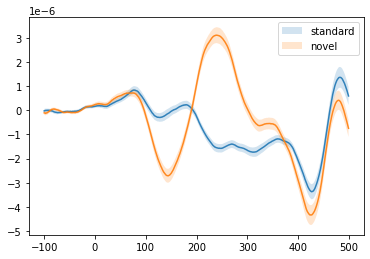

In [29]:
times = np.arange(-100,500,1)
adult_standard = adult_standard_erp[:,7,:]
adult_novel = adult_novel_erp[:,7,:]
plot_erp_results(adult_standard, adult_novel, times, con_labels=['standard', 'novel'], p_threshold=0.05)
diff = adult_novel-adult_standard

In [5]:
freqs = np.arange(1, 40, 2)
freqs

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])

# 时频分析

## 计算成年人在AV任务上的power值

In [6]:
adult_standard_tfr = []
adult_novel_tfr = []
# 设定⼀些时频分析的参数
# 频段选取4-30Hz
freqs = np.arange(1, 40, 2)
n_cycles = freqs / 2.

for i in range(78):
    
    ###读取standard
    standard_data_path = "E:/standard and novel/" + "sub"+str(i+1)+"/standard.set"
    #读取set文件中的epoch信息
    standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)
    #读取epoch中的数据，是[trial，电极，时间点]的矩阵
    standard_epochs_array = standard_epochs.get_data()
    
    # 使⽤MNE的time_frequency模块下的tfr_arrayy_morlet()函数
    # 其输⼊为[n_epochs, n_channels, n_times]的array
    # 同时接着依次传⼊数据采样率、计算频率、周期数和输出数据类型
    standard_tfr = tfr_array_morlet(standard_epochs_array, 1000, freqs, n_cycles, output='power')
    standard_tfr = np.average(standard_tfr,axis = 0)
    print(standard_tfr.shape)
    #基线矫正-100-0ms
    for chl in range(60):
        for freq in range(len(freqs)):
            standard_tfr[chl, freq] = 10 * np.log10(standard_tfr[chl, freq] /
                                  np.average(standard_tfr[chl, freq, 400:500]))
    standard_tfr_electrode = standard_tfr[[7,8,9,10,11,16,17,18,19,20,25,26,27,28,29]]
    standard_tfr_time = standard_tfr_electrode[:,:,400:]
    adult_standard_tfr.append(standard_tfr_time)
    
    
    
    
    ###读取novel
    novel_data_path = "E:/standard and novel/" + "sub"+str(i+1)+"/novel.set"
    #读取set文件中的epoch信息
    novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)
    #读取epoch中的数据，是[trial，电极，时间点]的矩阵
    novel_epochs_array = novel_epochs.get_data()
    novel_tfr = tfr_array_morlet(novel_epochs_array, 1000, freqs, n_cycles, output='power')
    novel_tfr = np.average(novel_tfr,axis = 0)
    print(novel_tfr.shape)
    #基线矫正-100-0ms
    for chl in range(60):
        for freq in range(len(freqs)):
            novel_tfr[chl, freq] = 10 * np.log10(novel_tfr[chl, freq] /
                                  np.average(novel_tfr[chl, freq, 400:500]))
    novel_tfr_electrode = novel_tfr[[7,8,9,10,11,16,17,18,19,20,25,26,27,28,29]]
    novel_tfr_time = novel_tfr_electrode[:,:,400:]
    print(novel_tfr_time.shape)
    adult_novel_tfr.append(novel_tfr_time)
    
    
adult_standard_tfr_all = np.array(adult_standard_tfr)
print(adult_standard_tfr_all.shape)
adult_novel_tfr_all = np.array(adult_novel_tfr)
print(adult_novel_tfr_all.shape)

Extracting parameters from E:/standard and novel/sub1/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub1/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub2/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub2/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub3/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub3/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub4/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub4/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub5/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(61, 20, 1000)
Extracting parameters from E:/standard and novel/sub5/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(61, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub6/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub6/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub7/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub7/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub8/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
93 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub8/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub9/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub9/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub10/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
85 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub10/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
91 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub11/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub11/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub12/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub12/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub13/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub13/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub14/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
94 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub14/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub15/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub15/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub16/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub16/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub17/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub17/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub18/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub18/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub19/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub19/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub20/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
85 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub20/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
91 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub21/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub21/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub22/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub22/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub23/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub23/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub24/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
93 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub24/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub25/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub25/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub26/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub26/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub27/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub27/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub28/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub28/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub29/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub29/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub30/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub30/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub31/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(61, 20, 1000)
Extracting parameters from E:/standard and novel/sub31/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(61, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub32/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub32/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub33/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
91 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub33/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
89 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub34/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub34/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub35/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub35/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub36/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub36/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub37/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub37/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
89 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub38/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub38/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub39/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub39/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
87 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub40/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(61, 20, 1000)
Extracting parameters from E:/standard and novel/sub40/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(61, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub41/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(60, 20, 1000)
Extracting parameters from E:/standard and novel/sub41/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(60, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub42/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(60, 20, 1000)
Extracting parameters from E:/standard and novel/sub42/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(60, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub43/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub43/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub44/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(61, 20, 1000)
Extracting parameters from E:/standard and novel/sub44/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(61, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub45/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub45/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub46/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(60, 20, 1000)
Extracting parameters from E:/standard and novel/sub46/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(60, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub47/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub47/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub48/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub48/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub49/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub49/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub50/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub50/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub51/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
94 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub51/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
90 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub52/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub52/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub53/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub53/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub54/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub54/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub55/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub55/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub56/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub56/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub57/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
93 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub57/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
93 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub58/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub58/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub59/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
94 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub59/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub60/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub60/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub61/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub61/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
94 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub62/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub62/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub63/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub63/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub64/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Ready.
(61, 20, 1000)
Extracting parameters from E:/standard and novel/sub64/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(61, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub65/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub65/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub66/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
88 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub66/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
87 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub67/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub67/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub68/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub68/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub69/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(60, 20, 1000)
Extracting parameters from E:/standard and novel/sub69/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(60, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub70/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub70/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
91 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub71/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(61, 20, 1000)
Extracting parameters from E:/standard and novel/sub71/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(61, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub72/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub72/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub73/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub73/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub74/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub74/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub75/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub75/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub76/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
83 matching events found
No baseline correction applied
0 projection items activated
Ready.
(60, 20, 1000)
Extracting parameters from E:/standard and novel/sub76/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
92 matching events found
No baseline correction applied
0 projection items activated
Ready.
(60, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub77/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated
Ready.
(61, 20, 1000)
Extracting parameters from E:/standard and novel/sub77/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
87 matching events found
No baseline correction applied
0 projection items activated
Ready.
(61, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub78/standard.set...


<ipython-input-6-c623e3af7c63>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
Extracting parameters from E:/standard and novel/sub78/novel.set...


<ipython-input-6-c623e3af7c63>:38: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(62, 20, 1000)
(15, 20, 600)


NameError: name 'tfr_standard' is not defined

In [10]:
#取一个电极点用于下面作图

adult_tfr_novel = adult_novel_tfr_all[:,7,:,:]
adult_tfr_standard = adult_standard_tfr_all[:,7,:,:]
adult_tfr_diff = adult_tfr_novel - adult_tfr_standard
adult_tfr_diff.shape

(78, 20, 600)

In [20]:
#取所有电极的平均用于下面作图
adult_tfr_novel_avg = np.average(adult_novel_tfr_all, axis = 1)
adult_tfr_standard_avg = np.average(adult_standard_tfr_all, axis = 1)

(78, 20, 600)

In [22]:
def plot_tfr_diff_results(tfr1, tfr2, freqs, times, p=0.01,
clim=[-2, 2]):
    """
    参数：
    tfr1 : shape为[n_subs, n_freqs, n_times]的矩阵，代表条件1下时频分析的结果
    tfr2 : shape为[n_subs, n_freqs, n_times]的矩阵，代表条件2下时频分析的结果
    freqs : shape为[n_freqs]的array，代表时频分析的频率（对应y轴的频率范围及频率点）
    times : shape为[n_times]的array，代表时频分析的时间点（对应x轴的时间范围及时间点）
    p : ⼀个浮点型数字，默认为0.01，代表p值的阈值
    clusterp : ⼀个浮点型数字，默认为0.05，代表cluster层⾯p值的阈值
    clim : ⼀个List或array，[最⼩值，最⼤值]，默认为[-2, 2]，代表颜⾊条的上下边界
    """
    n_freqs = len(freqs)
    n_times = len(times)
    # 统计分析
    # 注意：由于进⾏了cluster-based permutation test，需要运⾏较⻓时间
    # 这⾥使⽤NeuroRA的stuff模块下的clusterbased_permutation_2d_2sided()函数
    # 其返回的stats_results为⼀个shape为[n_freqs, n_times]的矩阵
    # 该矩阵中不显著的点的值为0，条件1显著⼤于条件2的点的值为1，条件1显著⼩于条件2的点的值为-1
    # 这⾥iter设成100是为了示例运⾏起来快⼀些，建议1000
    stats_results = clusterbased_permutation_2d_2sided(tfr1, tfr2,
    p_threshold=p,
    iter=100)
    # 计算△tfr
    tfr_diff = tfr1 - tfr2
    # 时频分析结果可视化
    fig, ax = plt.subplots(1, 1)
    # 勾勒显著性区域
    padsats_results = np.zeros([n_freqs + 2, n_times + 2])
    padsats_results[1:n_freqs + 1, 1:n_times + 1] = stats_results
    x = np.concatenate(([times[0]-1], times, [times[-1]+1]))
    y = np.concatenate(([freqs[0]-1], freqs, [freqs[-1]+1]))
    X, Y = np.meshgrid(x, y)
    ax.contour(X, Y, padsats_results, [0.5], colors="red", alpha=0.9,
    linewidths=2, linestyles="dashed")
    ax.contour(X, Y, padsats_results, [-0.5], colors="blue", alpha=0.9,
    linewidths=2, linestyles="dashed")
    # 绘制时频结果热⼒图
    im = ax.imshow(np.average(tfr_diff, axis=0), cmap='RdBu_r', origin='lower',
    extent=[times[0], times[-1], freqs[0], freqs[-1]], clim=clim)
    ax.set_aspect('auto')
    cbar = fig.colorbar(im)
    cbar.set_label('$\Delta$ dB')
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Frequency (Hz)')
    plt.show()

1 1

Permutation test

Side 1 begin:
Calculating: [====================================================================================================] 100.00%
Side 1 finished!

Side 2 begin:

Calculating: [====================================================================================================] 100.00%
Side 2 finished!

Cluster-based permutation test finished!



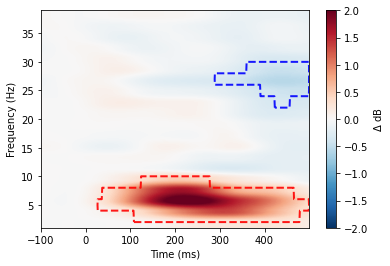

<Figure size 432x288 with 0 Axes>

In [23]:
freqs = np.arange(1, 40, 2)
times = np.arange(-100, 500, 1)
plot_tfr_diff_results(adult_tfr_novel, adult_tfr_standard, freqs, times,p = 0.01, clim=[-2, 2])
plt.savefig('adult_novel-standard_tfr_FCZ.png', bbox_inches='tight')

1 2

Permutation test

Side 1 begin:
Calculating: [====================================================================================================] 100.00%
Side 1 finished!

Side 2 begin:

Calculating: [====================================================================================================] 100.00%
Side 2 finished!

Cluster-based permutation test finished!



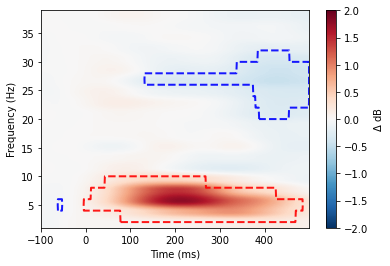

In [21]:
freqs = np.arange(1, 40, 2)
times = np.arange(-100, 500, 1)
plot_tfr_diff_results(adult_tfr_novel_avg, adult_tfr_standard_avg, freqs, times,p = 0.01, clim=[-2, 2])

## 计算儿童在AV任务上的power值

In [7]:
child_standard_tfr = []
child_novel_tfr = []
# 设定⼀些时频分析的参数
# 频段选取4-30Hz
freqs = np.arange(1, 40, 2)
n_cycles = freqs / 2.

for i in range(113):
    
    ###读取standard
    standard_data_path = "E:/standard and novel/" + "sub"+str(i+79)+"/standard.set"
    #读取set文件中的epoch信息
    standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)
    #读取epoch中的数据，是[trial，电极，时间点]的矩阵
    standard_epochs_array = standard_epochs.get_data()
    
    # 使⽤MNE的time_frequency模块下的tfr_arrayy_morlet()函数
    # 其输⼊为[n_epochs, n_channels, n_times]的array
    # 同时接着依次传⼊数据采样率、计算频率、周期数和输出数据类型
    standard_tfr = tfr_array_morlet(standard_epochs_array, 1000, freqs, n_cycles, output='power')
    standard_tfr = np.average(standard_tfr,axis = 0)
    print(standard_tfr.shape)
    #基线矫正-100-0ms
    for chl in range(70):
        for freq in range(len(freqs)):
            standard_tfr[chl, freq] = 10 * np.log10(standard_tfr[chl, freq] /
                                  np.average(standard_tfr[chl, freq, 400:500]))
    #["F3","F1","FZ","F2","F4","FC3","FC1","FCZ","FC2","FC4","C3","C1","CZ","C2","C4"]        
    standard_tfr_electrode = standard_tfr[[12,9,6,3,68,16,7,4,61,60,21,17,69,58,57]]
    standard_tfr_time = standard_tfr_electrode[:,:,400:]
    child_standard_tfr.append(standard_tfr_time)
    
    
    
    
    ###读取novel
    novel_data_path = "E:/standard and novel/" + "sub"+str(i+79)+"/novel.set"
    #读取set文件中的epoch信息
    novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)
    #读取epoch中的数据，是[trial，电极，时间点]的矩阵
    novel_epochs_array = novel_epochs.get_data()
    novel_tfr = tfr_array_morlet(novel_epochs_array, 1000, freqs, n_cycles, output='power')
    novel_tfr = np.average(novel_tfr,axis = 0)
    print(novel_tfr.shape)
    #基线矫正-100-0ms
    for chl in range(70):
        for freq in range(len(freqs)):
            novel_tfr[chl, freq] = 10 * np.log10(novel_tfr[chl, freq] /
                                  np.average(novel_tfr[chl, freq, 400:500]))
    novel_tfr_electrode = novel_tfr[[12,9,6,3,68,16,7,4,61,60,21,17,69,58,57]]
    novel_tfr_time = novel_tfr_electrode[:,:,400:]
    print(novel_tfr_time.shape)
    child_novel_tfr.append(novel_tfr_time)
    
    
child_standard_tfr_all = np.array(child_standard_tfr)
print(child_standard_tfr_all.shape)
child_novel_tfr_all = np.array(child_novel_tfr)
print(child_novel_tfr_all.shape)

Extracting parameters from E:/standard and novel/sub79/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub79/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub80/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub80/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub81/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub81/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub82/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub82/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub83/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub83/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub84/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
85 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub84/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
88 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub85/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub85/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub86/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub86/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub87/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub87/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub88/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
81 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub88/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
77 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub89/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub89/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub90/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub90/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub91/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub91/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub92/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
77 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub92/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
76 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub93/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub93/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub94/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
92 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub94/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub95/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub95/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
74 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub96/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
90 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub96/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
89 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub97/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub97/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub98/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
66 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub98/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
66 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub99/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub99/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub100/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
92 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub100/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
91 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub101/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub101/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub102/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
94 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub102/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
90 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub103/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub103/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub104/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
93 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub104/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
90 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub105/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
90 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub105/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
85 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub106/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub106/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub107/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub107/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub108/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
91 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub108/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub109/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub109/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub110/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub110/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub111/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub111/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub112/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub112/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
85 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub113/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
82 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub113/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
88 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub114/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub114/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub115/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub115/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
92 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub116/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub116/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub117/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub117/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub118/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
88 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub118/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
94 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub119/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
87 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub119/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
87 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub120/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub120/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub121/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub121/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub122/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub122/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
94 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub123/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub123/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
94 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub124/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub124/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
94 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub125/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub125/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub126/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub126/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub127/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub127/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub128/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub128/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
94 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub129/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub129/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub130/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
67 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub130/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
62 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub131/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub131/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub132/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
91 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub132/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
89 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub133/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
93 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub133/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub134/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
85 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub134/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
87 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub135/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub135/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub136/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub136/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub137/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
93 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub137/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub138/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub138/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub139/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
92 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub139/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub140/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub140/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub141/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
91 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub141/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
93 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub142/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub142/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub143/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub143/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub144/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub144/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub145/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
90 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub145/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
91 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub146/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub146/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub147/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub147/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub148/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
76 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub148/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
70 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub149/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
94 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub149/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
94 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub150/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub150/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub151/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub151/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub152/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub152/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub153/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
90 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub153/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
92 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub154/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub154/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub155/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub155/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub156/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub156/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub157/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
86 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub157/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
88 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub158/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub158/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
93 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub159/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
91 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub159/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
90 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub160/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub160/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub161/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub161/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub162/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
87 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub162/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
88 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub163/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
94 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub163/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
93 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub164/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub164/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub165/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
91 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub165/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
90 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub166/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub166/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub167/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub167/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub168/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub168/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub169/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub169/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub170/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub170/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub171/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub171/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub172/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub172/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub173/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
81 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub173/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
83 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub174/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub174/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub175/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub175/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub176/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub176/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub177/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub177/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub178/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
86 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub178/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
84 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub179/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub179/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub180/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub180/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub181/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
92 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub181/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
93 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub182/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub182/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub183/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub183/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub184/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub184/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub185/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub185/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub186/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub186/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub187/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub187/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub188/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub188/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub189/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub189/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub190/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub190/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
Extracting parameters from E:/standard and novel/sub191/standard.set...


<ipython-input-7-d85d77267efa>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  standard_epochs = mne.io.read_epochs_eeglab(standard_data_path)


Not setting metadata
Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
Extracting parameters from E:/standard and novel/sub191/novel.set...


<ipython-input-7-d85d77267efa>:39: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  novel_epochs = mne.io.read_epochs_eeglab(novel_data_path)


Not setting metadata
Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
Ready.
(70, 20, 1000)
(15, 20, 600)
(113, 15, 20, 600)
(113, 15, 20, 600)


In [ ]:
freqs = np.arange(1, 40, 2)
times = np.arange(-100, 500, 1)
plot_tfr_diff_results(child_tfr_novel, child_tfr_standard, freqs, times,p = 0.01, clim=[-2, 2])

# 提取数据导出excel

In [62]:
#计算差异波，提取感兴趣的频段和时段
child_diff = child_novel_tfr_all - child_standard_tfr_all
child_diff_theta_early = child_diff[:,:,[2,3],180:350]
child_diff_theta_late = child_diff[:,:,[2,3],350:500]
child_diff_beta_high = child_diff[:,:,[12,13,14],450:600]
#对感兴趣的频段和时段取平均
child_theta_early = np.average(child_diff_theta_early, axis = 3)
child_theta_early = np.average(child_theta_early, axis = 2)
child_theta_lata = np.average(child_diff_theta_late, axis = 3)
child_theta_late = np.average(child_theta_lata, axis = 2)
child_beta_high = np.average(child_diff_beta_high, axis = 3)
child_beta_high = np.average(child_beta_high, axis = 2)
#将所有频率特征放一起
child_power = np.concatenate((child_theta_early, child_theta_late,child_beta_high), axis=1)
child_power.shape




###成年人数据重复上述步骤


adult_standard_tfr_all = np.array(adult_standard_tfr)
print(adult_standard_tfr_all.shape)
adult_novel_tfr_all = np.array(adult_novel_tfr)
print(adult_novel_tfr_all.shape)

adult_diff = adult_novel_tfr_all - adult_standard_tfr_all
adult_diff_theta_early = adult_diff[:,:,[2,3],180:350]
adult_diff_theta_late = adult_diff[:,:,[2,3],350:500]
adult_diff_beta_high = adult_diff[:,:,[12,13,14],450:600]
adult_theta_early = np.average(adult_diff_theta_early, axis = 3)
adult_theta_early = np.average(adult_theta_early, axis = 2)
adult_theta_lata = np.average(adult_diff_theta_late, axis = 3)
adult_theta_late = np.average(adult_theta_lata, axis = 2)
adult_beta_high = np.average(adult_diff_beta_high, axis = 3)
adult_beta_high = np.average(adult_beta_high, axis = 2)

adult_power = np.concatenate((adult_theta_early, adult_theta_late,adult_beta_high), axis=1)
adult_power.shape


#将儿童和成人数据叠加在一起
AV_power = np.concatenate((adult_power, child_power), axis = 0)
#导出成excel
AV_power = np.mat(AV_power)
AV_power = pd.DataFrame(AV_power)
AV_power.to_excel('AV_power.xlsx')



(113, 45)